## Name: Aman P

## Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages:
    a. Loadingand preprocessing the image data
    b. Defining the model's architecture
    c. Training the model
    d. Estimating the model's performance 

In [3]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [1]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

NameError: name 'cifar10' is not defined

In [2]:
# Visualize a few sample images from the dataset

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'Class: {y_train[i]}')
    plt.axis("off")

plt.show()

NameError: name 'plt' is not defined

In [4]:
X_train  = X_train/255.0
X_test = X_test/255.0

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [7]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(16,(3,3),activation='relu'),
    Flatten(),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 256)               0

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
epochs = 2
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/2
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7077 - accuracy: 0.3677 - val_loss: 1.5938 - val_accuracy: 0.4263
Epoch 2/2
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3549 - accuracy: 0.5062 - val_loss: 1.3009 - val_accuracy: 0.5353


313/313 [==============================] - 1s 3ms/step


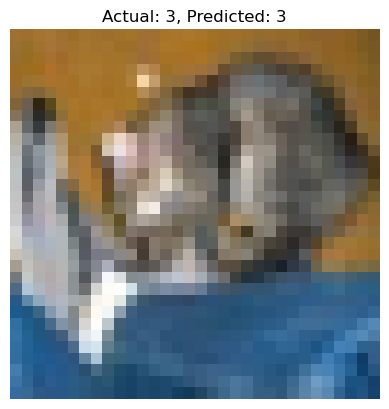

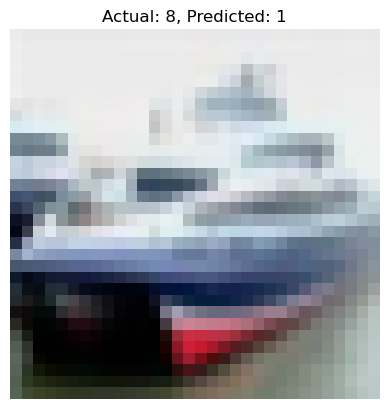

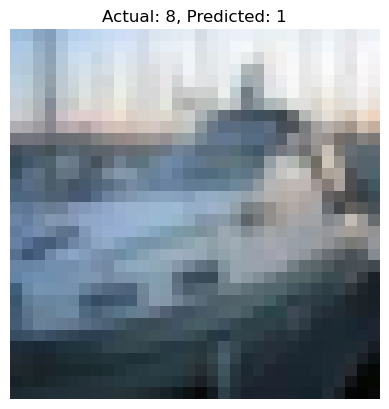

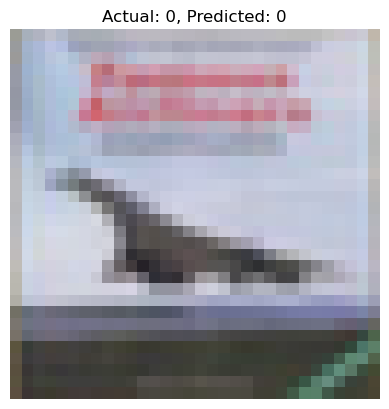

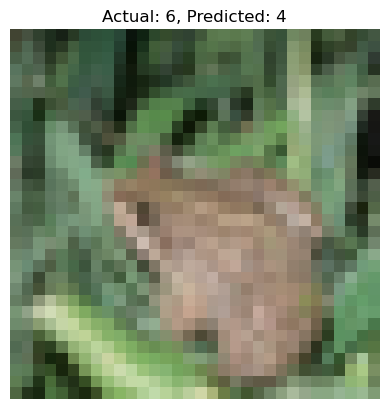

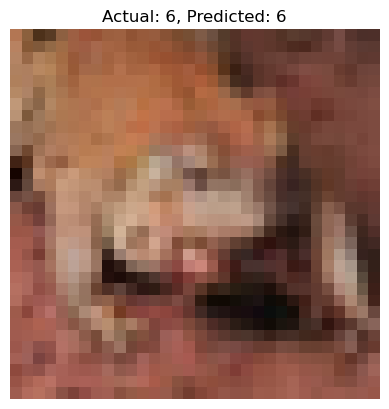

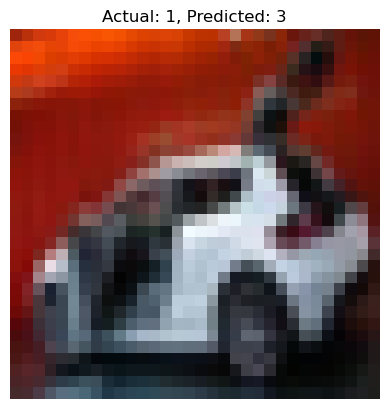

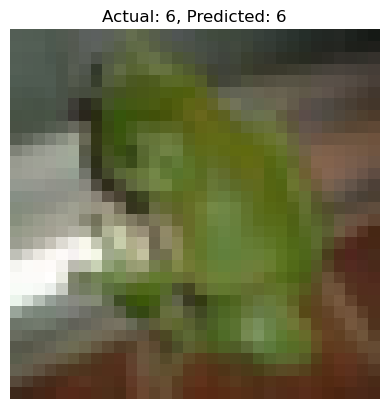

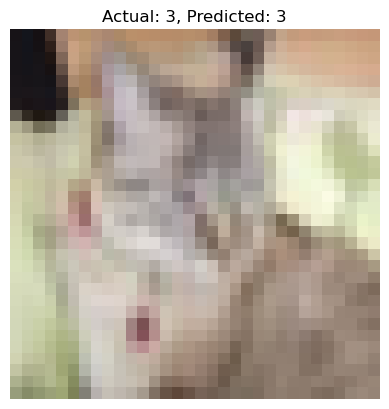

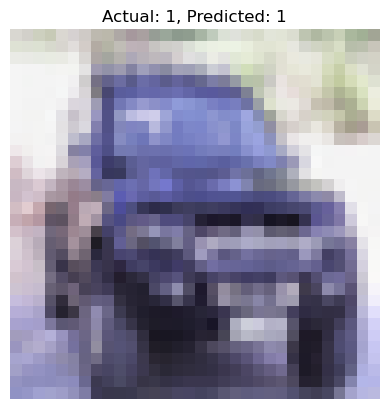

In [10]:
# Predictions
predictions = model.predict(X_test)

# Function to display actual and predicted labels with images
def display_actual_vs_predicted(n):
    actual_label = y_test[n]
    predicted_label = np.argmax(predictions[n])

    plt.imshow(X_test[n])
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.axis("off")
    plt.show()

# Display a few examples
for i in range(10):
    display_actual_vs_predicted(i)

In [11]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.49      0.61      0.54      1000
           1       0.54      0.82      0.65      1000
           2       0.37      0.28      0.32      1000
           3       0.37      0.27      0.31      1000
           4       0.43      0.54      0.48      1000
           5       0.49      0.41      0.45      1000
           6       0.65      0.66      0.66      1000
           7       0.72      0.55      0.63      1000
           8       0.62      0.65      0.64      1000
           9       0.66      0.56      0.61      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



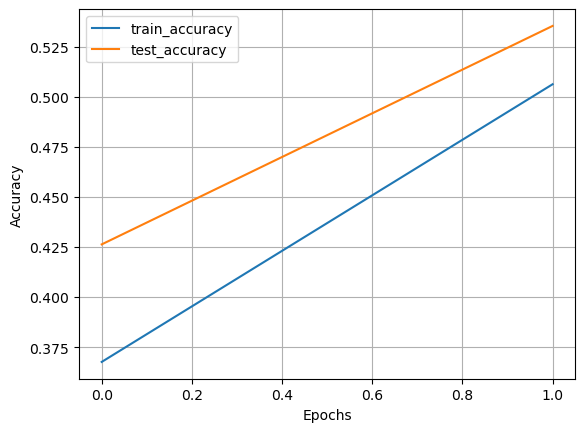

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

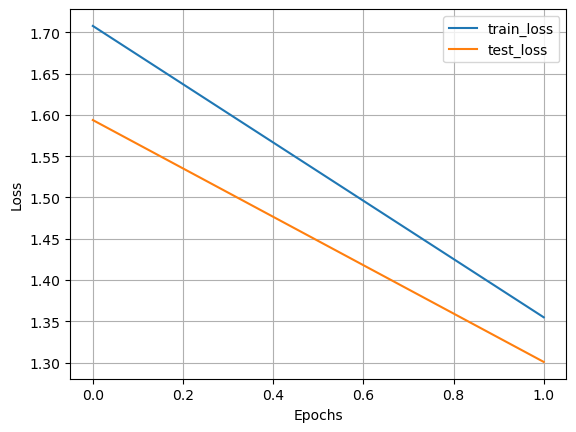

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();